In [28]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input, test_target) = imdb.load_data(num_words=500)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must sp

In [29]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [30]:
print(len(train_input[0]))

218


In [31]:
len(train_input[1])

189

In [32]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [33]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [34]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,random_state=42)

In [35]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [36]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


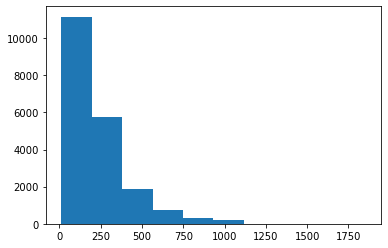

In [37]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.show()

In [71]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)

In [72]:
print(train_seq.shape)

(20000, 100)


In [73]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [74]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [75]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [76]:
val_seq=pad_sequences(val_input,maxlen=100)

In [45]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [46]:
train_oh = keras.utils.to_categorical(train_seq)

In [48]:
train_oh.shape

(20000, 100, 500)

In [49]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [50]:
np.sum(train_oh[0][0])

1.0

In [51]:
val_oh=keras.utils.to_categorical(val_seq)

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [57]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
histort = model.fit(train_oh,train_target,epochs=100, batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 18ms/step - loss: 0.6929 - accuracy: 0.5267 - val_loss: 0.6873 - val_accuracy: 0.5538
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6725 - accuracy: 0.5893 - val_loss: 0.6623 - val_accuracy: 0.6108
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6477 - accuracy: 0.6403 - val_loss: 0.6373 - val_accuracy: 0.6668
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6244 - accuracy: 0.6769 - val_loss: 0.6173 - val_accuracy: 0.6944
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6034 - accuracy: 0.7013 - val_loss: 0.5988 - val_accuracy: 0.7050
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5860 - accuracy: 0.7208 - val_loss: 0.5829 - val_accuracy: 0.7188
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5691 - accuracy: 0.7335 - val_loss: 0.5680 - val_accuracy:

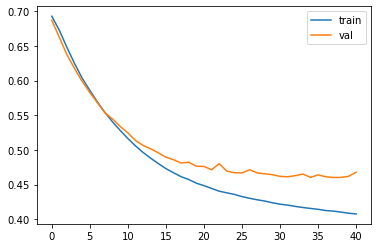

In [59]:
plt.plot(histort.history['loss'])
plt.plot(histort.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [84]:
print(train_seq.nbytes,train_oh.nbytes)

8000000 4000000000


In [85]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [86]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [87]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq ,train_target,epochs=100, batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_cb])

Epoch 1/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6977 - accuracy: 0.5029 - val_loss: 0.6967 - val_accuracy: 0.5016
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6922 - accuracy: 0.5222 - val_loss: 0.6946 - val_accuracy: 0.5122
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6884 - accuracy: 0.5424 - val_loss: 0.6933 - val_accuracy: 0.5168
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6850 - accuracy: 0.5591 - val_loss: 0.6924 - val_accuracy: 0.5258
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6815 - accuracy: 0.5715 - val_loss: 0.6918 - val_accuracy: 0.5292
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6779 - accuracy: 0.5816 - val_loss: 0.6911 - val_accuracy: 0.5342
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6743 - accuracy: 0.5899 - val_loss: 0.6907 - val_accuracy:

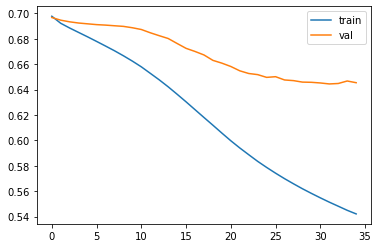

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()